In [1]:
"""ref: https://qiita.com/harmegiddo/items/84552c32f4b75c26878a"""

'ref: https://qiita.com/harmegiddo/items/84552c32f4b75c26878a'

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd, svdvals

In [3]:
t_max = 6 * np.pi

x = np.linspace(-10, 10, 100)
t = np.linspace(0, t_max, 80)
dt = t[2] - t[1]
Xm, Tm = np.meshgrid(x, t)

In [4]:
f1 = np.multiply(20 - 0.2 * np.power(Xm, 2), np.exp((2.3j) * Tm))
f2 = np.multiply(Xm, np.exp(0.6j * Tm))
f3 = np.multiply(5 * np.multiply(1 / np.cosh(Xm / 2), np.tanh(Xm / 2)), 2 * np.exp((0.1 + 2.8j) * Tm))

In [5]:
D = (f1 + f2 + f3).T

In [14]:
X = D[:, :-1]
Y = D[:, 1:]

(100, 80)

<Figure size 432x288 with 0 Axes>

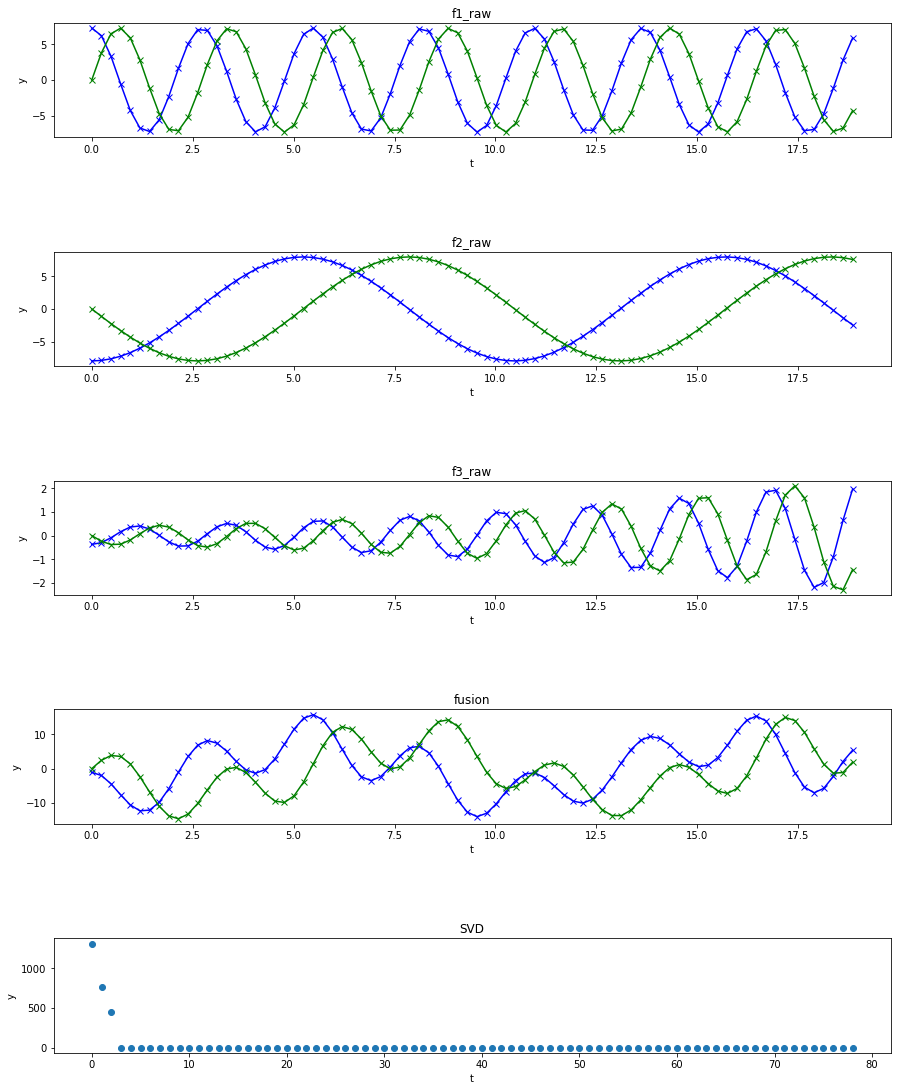

In [9]:
ax = []
plt.clf()
ax_count = 1
max_plot_num = 10
indx = 10
fig = plt.figure(figsize=(15, 40))
fig.subplots_adjust(hspace=1)

ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('f1_raw')
ax[-1].plot(t, f1.T.real[indx,:], color='blue', label='Real', marker='x')
ax[-1].plot(t, f1.T.imag[indx,:], color='green', label='Complex', marker='x')
ax_count += 1

ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('f2_raw')
ax[-1].plot(t, f2.T.real[indx,:], color='blue', label='Real', marker='x')
ax[-1].plot(t, f2.T.imag[indx,:], color='green', label='Complex', marker='x')
ax_count += 1

ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('f3_raw')
ax[-1].plot(t, f3.T.real[indx,:], color='blue', label='Real', marker='x')
ax[-1].plot(t, f3.T.imag[indx,:], color='green', label='Complex', marker='x')
ax_count += 1

ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('fusion')
ax[-1].plot(t, D.real[indx,:], color='blue', label='Real', marker='x')
ax[-1].plot(t, D.imag[indx,:], color='green', label='Complex', marker='x')
ax_count += 1

U2,Sig2,Vh2 = svd(X, False)

ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('SVD')
ax[-1].scatter(range(0, len(Sig2)), Sig2, label="SVD")
ax_count += 1

plt.savefig( 'output.png' )


In [15]:
from numpy import dot, multiply, diag, power
from numpy import pi, exp, sin, cos, cosh, tanh, real, imag
from numpy.linalg import inv, eig, pinv

# rank-3 truncation
r = 3
U = U2[:,:r]
Sig = diag(Sig2)[:r,:r]
V = Vh2.conj().T[:,:r]

# build A tilde
Atil = dot(dot(dot(U.conj().T, Y), V), inv(Sig))
mu,W = eig(Atil)

# build DMD modes
Phi = dot(dot(dot(Y, V), inv(Sig)), W)

# compute time evolution
b = dot(pinv(Phi), X[:,0])
Psi = np.zeros([r, len(t)], dtype='complex')
for i,_t in enumerate(t):
    Psi[:,i] = multiply(power(mu, _t/dt), b)

In [33]:
# 復元
print(U2.shape)
print(Sig2.shape)
print(Vh2.shape)
re_data = np.dot(np.dot(U2, np.diag(Sig2)), Vh2)
re_data.shape

(100, 79)
(79,)
(79, 79)


(100, 79)

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

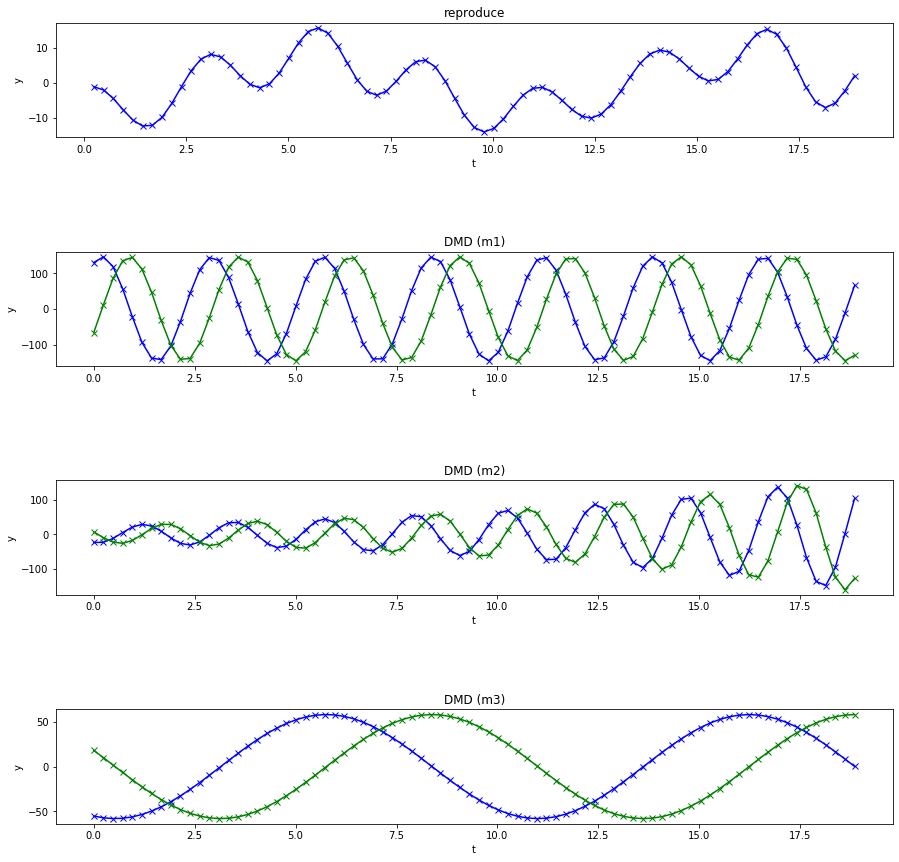

In [29]:


ax = []
plt.clf()
ax_count = 1
max_plot_num = 10
indx = 10
fig = plt.figure(figsize=(15, 40))
fig.subplots_adjust(hspace=1)

ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('reproduce')
ax[-1].plot(t[1:], re_data[indx, :], color='blue', label='Real', marker='x')
ax_count += 1

ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('DMD (m1)')
ax[-1].plot(t, Psi.real[0,:], color='blue', label='Original', marker='x')
ax[-1].plot(t, Psi.imag[0,:], color='green', label='Complex', marker='x')
ax_count += 1

ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('DMD (m2)')
ax[-1].plot(t, Psi.real[1,:], color='blue', label='Original', marker='x')
ax[-1].plot(t, Psi.imag[1,:], color='green', label='Complex', marker='x')
ax_count += 1


ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('DMD (m3)')
ax[-1].plot(t, Psi.real[2,:], color='blue', label='Original', marker='x')
ax[-1].plot(t, Psi.imag[2,:], color='green', label='Complex', marker='x')
ax_count += 1